In [105]:
!pip install wordcloud

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [108]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [109]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [110]:
df.Summary.dropna(inplace=True)
df.Summary

0       During a demonstration flight, a U.S. Army fly...
1       First U.S. dirigible Akron exploded just offsh...
2       The first fatal airplane accident in Canada oc...
3       The airship flew into a thunderstorm and encou...
4       Hydrogen gas which was being vented was sucked...
5       Crashed into trees while attempting to land af...
6       Exploded and burned near Neuwerk Island,  when...
7              Crashed near the Black Sea, cause unknown.
8       Shot down by British aircraft crashing in flames.
9       Shot down in flames by the British 39th Home D...
10                                    Crashed in a storm.
11      Shot down by British anti-aircraft fire and ai...
12                               Caught fire and crashed.
13      Struck by lightning and crashed into the Balti...
14      Crashed into the sea from an altitude of 3,000...
15                         Shot down by British aircraft.
16                         Shot down by British aircraft.
17            

In [111]:
from nltk.stem.porter import PorterStemmer
import numpy as np

In [112]:
stemmer = PorterStemmer()

def stem(text):
    text_stem = [stemmer.stem(token) for token in text.split(' ')]
    text_stem_join = ' '.join(text_stem)
    return text_stem_join

In [113]:
corpus = ''
for accident_cause in df.Summary:
    corpus += accident_cause
    corpus += ' '

In [114]:
corpus

"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later. First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight. The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed. The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants. Hydrogen gas which was being vented was sucked into

In [115]:
stemmed_corpus = stem(corpus) # corpus is a numpy array FIXME
stemmed_corpus

"dure a demonstr flight, a u.s. armi flyer flown by orvil wright nose-div into the ground from a height of approxim 75 feet, kill lt. thoma E. selfridg who wa a passenger. thi wa the first record airplan fatal in history.  one of two propel separ in flight, tear loos the wire brace the rudder and caus the loss of control of the aircraft.  orvil wright suffer broken ribs, pelvi and a leg.  selfridg suffer a crush skull and die a short time later. first u.s. dirig akron explod just offshor at an altitud of 1,000 ft. dure a test flight. the first fatal airplan accid in canada occur when american barnstormer, john M. bryant, california aviat wa killed. the airship flew into a thunderstorm and encount a sever downdraft crash 20 mile north of helgoland island into the sea. the ship broke in two and the control car immedi sank drown it occupants. hydrogen ga which wa be vent wa suck into the forward engin and ignit caus the airship to explod and burn at 3,000 ft.. crash into tree while attemp

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
tfidf = TfidfVectorizer(norm='l2', use_idf=True, stop_words='english')
my_stop_words = ['flight', 'aircraft', 'crashed', 'plane', 'passenger', 'suffer', 'approximately', 'crash', 'wa', 'caus', 'pilot']
stop_words = tfidf.get_stop_words().union(my_stop_words)
'flight' in stop_words

True

In [118]:
# %matplotlib
from wordcloud import WordCloud

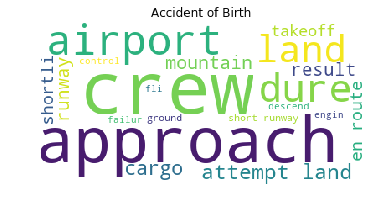

In [131]:
wc = WordCloud(background_color='white', max_words=20, stopwords=stop_words)
# wc_ = WordCloud(background_color='white', max_words=30, stopwords=tfidf.get_stop_words())

wc.generate(stemmed_corpus)
# wc_.generate(top_corpus_two)

fig = plt.figure()
# a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(wc)
plt.title("Accident of Birth")
plt.axis("off")

# a = fig.add_subplot(1,2,2)
# imgplot = plt.imshow(wc_)
# plt.title(top_title_two)
# plt.axis("off")

plt.show()